In [1]:
import timeit

start_time = timeit.default_timer()

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
plt.style.use('ggplot')

# Task 1

### Watts-Strogatz Graph

In [2]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
wsg3 = nx.watts_strogatz_graph(n=1000, k=10, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=10, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=10, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=10, p=0.01)

In [3]:
def giant_when_removing(graph):
    """Returns the sizes of biggest subgraphs for each fraction of removed nodes
    Fractions start at 0.5 and go to ca. 0.97 (it's amount of nodes divided by elements from fractions array)"""
    giants = list()
    # Couldn't thnik of smarter solution
    fractions = np.array([2.0, 1.75, 1.5, 1.3, 1.2, 1.1, 1.05, 1.03])

    for f in fractions:
        x = np.random.choice(len(graph.nodes()), int(len(graph.nodes())/f), replace=False)
        # Only now I realise how ineffective this is. But "if it works, don't touch it" :P
        gc = graph.copy()
        gc.remove_nodes_from(x)
        giants.append(len(max(nx.connected_components(gc), key = len)))
    return giants

def giant_without_removing(graph):
    """This is basically len(graph.nodes())"""
    return len(max(nx.connected_components(graph), key = len))

In [4]:
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])
gs

[[0.399, 0.288, 0.078, 0.013, 0.009, 0.005, 0.003, 0.002],
 [0.4055, 0.2546, 0.0071, 0.0027, 0.002, 0.0008, 0.0005, 0.0004],
 [0.39906, 0.10413, 0.00222, 0.0005, 0.00022, 0.0001, 5e-05, 4e-05],
 [0.397222, 0.135705, 0.000336, 6.9e-05, 2.9e-05, 1.5e-05, 7e-06, 6e-06]]

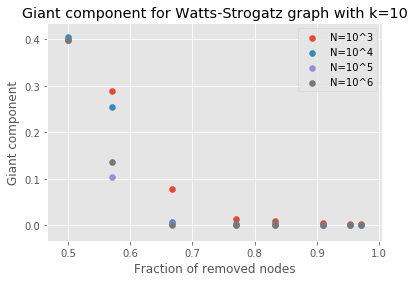

In [5]:
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for Watts-Strogatz graph with k=10")
plt.show()

In [6]:
# Redeclare for k=20
wsg3 = nx.watts_strogatz_graph(n=1000, k=20, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=20, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=20, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=20, p=0.01)

In [7]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])

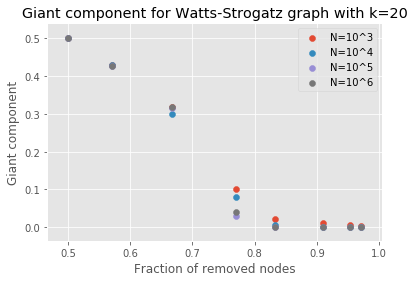

In [8]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for Watts-Strogatz graph with k=20")
plt.show()

In [9]:
# Redeclare for k=30
wsg3 = nx.watts_strogatz_graph(n=1000, k=30, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=30, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=30, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=30, p=0.01)

In [10]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(wsg3) for x in giant_when_removing(wsg3)])
gs.append([x/giant_without_removing(wsg4) for x in giant_when_removing(wsg4)])
gs.append([x/giant_without_removing(wsg5) for x in giant_when_removing(wsg5)])
gs.append([x/giant_without_removing(wsg6) for x in giant_when_removing(wsg6)])

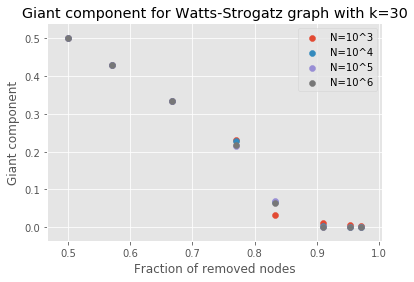

In [11]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for Watts-Strogatz graph with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for Watts-Strogatz graph with k=30")
plt.show()

### Random Graph

In [12]:
# k=10
er3 = nx.fast_gnp_random_graph(n=1000, p=10/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=10/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=10/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=10/(1000000-1))

In [13]:
def mean_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    return sum(degrees)/float(len(degrees))

print(mean_degree(er3))
print(mean_degree(er4))
print(mean_degree(er5))
print(mean_degree(er6))

9.866
10.0936
9.98484
10.004526


In [14]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(er3) for x in giant_when_removing(er3)])
gs.append([x/giant_without_removing(er4) for x in giant_when_removing(er4)])
gs.append([x/giant_without_removing(er5) for x in giant_when_removing(er5)])
gs.append([x/giant_without_removing(er6) for x in giant_when_removing(er6)])

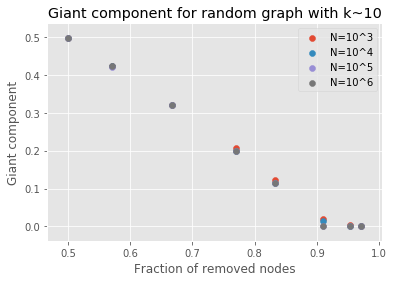

In [15]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for random graph with k~10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for random graph with k~10")
plt.show()

In [16]:
# k=20
er3 = nx.fast_gnp_random_graph(n=1000, p=20/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=20/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=20/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=20/(1000000-1))
print(mean_degree(er3))

20.186


In [17]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(er3) for x in giant_when_removing(er3)])
gs.append([x/giant_without_removing(er4) for x in giant_when_removing(er4)])
gs.append([x/giant_without_removing(er5) for x in giant_when_removing(er5)])
gs.append([x/giant_without_removing(er6) for x in giant_when_removing(er6)])

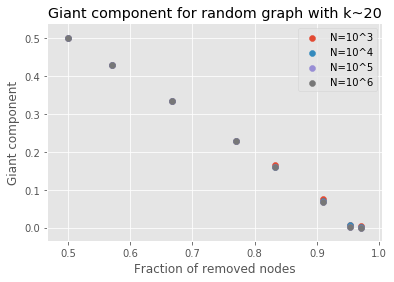

In [18]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for random graph with k~20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for random graph with k~20")
plt.show()

In [19]:
# k=30
er3 = nx.fast_gnp_random_graph(n=1000, p=30/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=30/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=30/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=30/(1000000-1))
print(mean_degree(er3))

30.086


In [20]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(er3) for x in giant_when_removing(er3)])
gs.append([x/giant_without_removing(er4) for x in giant_when_removing(er4)])
gs.append([x/giant_without_removing(er5) for x in giant_when_removing(er5)])
gs.append([x/giant_without_removing(er6) for x in giant_when_removing(er6)])

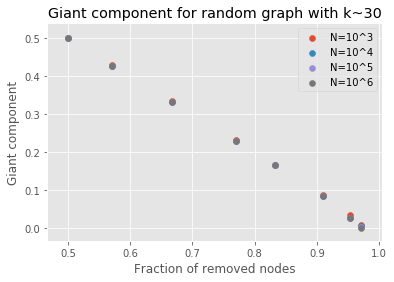

In [21]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for random graph with k~30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for random graph with k~30")
plt.show()

### Barabasi-Albert graph

In [22]:
# k=10
ba3 = nx.barabasi_albert_graph(n=1000,m=5)
ba4 = nx.barabasi_albert_graph(n=10000,m=5)
ba5 = nx.barabasi_albert_graph(n=100000,m=5)
ba6 = nx.barabasi_albert_graph(n=1000000,m=5)
print(mean_degree(ba3))

9.95


In [23]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(ba3) for x in giant_when_removing(ba3)])
gs.append([x/giant_without_removing(ba4) for x in giant_when_removing(ba4)])
gs.append([x/giant_without_removing(ba5) for x in giant_when_removing(ba5)])
gs.append([x/giant_without_removing(ba6) for x in giant_when_removing(ba6)])

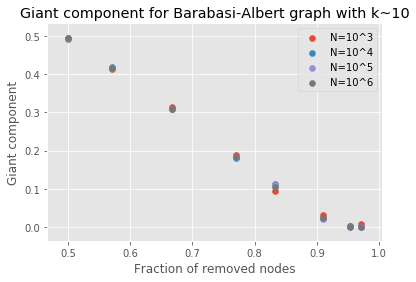

In [24]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for Barabasi-Albert graph with k~10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for Barabasi-Albert graph with k~10")
plt.show()

In [25]:
# k=20
ba3 = nx.barabasi_albert_graph(n=1000,m=10)
ba4 = nx.barabasi_albert_graph(n=10000,m=10)
ba5 = nx.barabasi_albert_graph(n=100000,m=10)
ba6 = nx.barabasi_albert_graph(n=1000000,m=10)
print(mean_degree(ba3))

19.8


In [26]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(ba3) for x in giant_when_removing(ba3)])
gs.append([x/giant_without_removing(ba4) for x in giant_when_removing(ba4)])
gs.append([x/giant_without_removing(ba5) for x in giant_when_removing(ba5)])
gs.append([x/giant_without_removing(ba6) for x in giant_when_removing(ba6)])

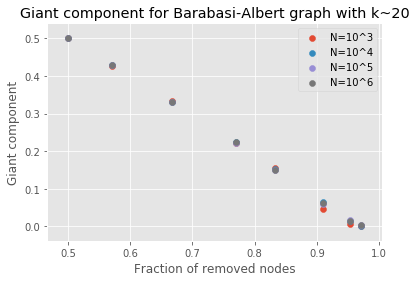

In [27]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for Barabasi-Albert graph with k~20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for Barabasi-Albert graph with k~20")
plt.show()

In [28]:
# k=30
ba3 = nx.barabasi_albert_graph(n=1000,m=15)
ba4 = nx.barabasi_albert_graph(n=10000,m=15)
ba5 = nx.barabasi_albert_graph(n=100000,m=15)
ba6 = nx.barabasi_albert_graph(n=1000000,m=15)
print(mean_degree(ba3))

29.55


In [29]:
# Calculate
gs = list()
gs.append([x/giant_without_removing(ba3) for x in giant_when_removing(ba3)])
gs.append([x/giant_without_removing(ba4) for x in giant_when_removing(ba4)])
gs.append([x/giant_without_removing(ba5) for x in giant_when_removing(ba5)])
gs.append([x/giant_without_removing(ba6) for x in giant_when_removing(ba6)])

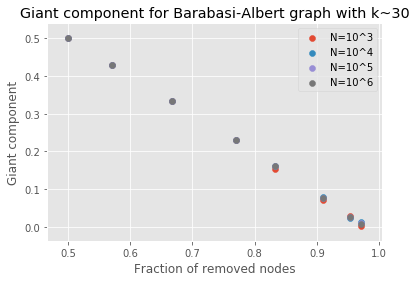

In [30]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for Barabasi-Albert graph with k~30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for Barabasi-Albert graph with k~30")
plt.show()

# Task 2

In [31]:
def giant_when_attacking(graph):
    """Returns the sizes of biggest subgraphs for each fraction of removed nodes
    Fractions start at 0.5 and go to ca. 0.97 (it's amount of nodes divided by elements from fractions array)"""
    giants = list()
    # Couldn't thnik of smarter solution
    fractions = np.array([2.0, 1.75, 1.5, 1.3, 1.2, 1.1, 1.05, 1.03])

    for f in fractions:
        xx = [x[0] for x in sorted(graph.degree, key=lambda x: x[1], reverse=True)]
        x = xx[0:int(len(graph.nodes())/f)]
        # Only now I realise how ineffective this is. But "if it works, don't touch it" :P
        gc = graph.copy()
        gc.remove_nodes_from(x)
        giants.append(len(max(nx.connected_components(gc), key = len)))
    return giants

def giant_without_attacking(graph):
    """This is basically len(graph.nodes())"""
    return len(max(nx.connected_components(graph), key = len))

In [32]:
# N=1000, 10000, 100000, 1000000
# k=10, 20, 30
wsg3 = nx.watts_strogatz_graph(n=1000, k=10, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=10, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=10, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=10, p=0.01)

In [33]:
gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking(wsg6)])

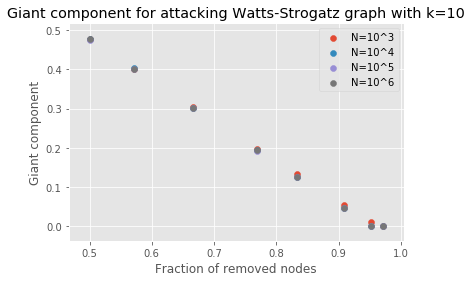

In [34]:
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph with k=10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph with k=10")
plt.show()

In [35]:
# Redeclare for k=20
wsg3 = nx.watts_strogatz_graph(n=1000, k=20, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=20, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=20, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=20, p=0.01)

In [36]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking(wsg6)])

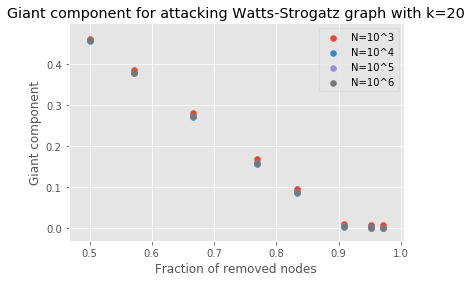

In [37]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph with k=20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph with k=20")
plt.show()

In [38]:
# Redeclare for k=30
wsg3 = nx.watts_strogatz_graph(n=1000, k=30, p=0.01)
wsg4 = nx.watts_strogatz_graph(n=10000, k=30, p=0.01)
wsg5 = nx.watts_strogatz_graph(n=100000, k=30, p=0.01)
wsg6 = nx.watts_strogatz_graph(n=1000000, k=30, p=0.01)

In [39]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(wsg3) for x in giant_when_attacking(wsg3)])
gs.append([x/giant_without_attacking(wsg4) for x in giant_when_attacking(wsg4)])
gs.append([x/giant_without_attacking(wsg5) for x in giant_when_attacking(wsg5)])
gs.append([x/giant_without_attacking(wsg6) for x in giant_when_attacking(wsg6)])

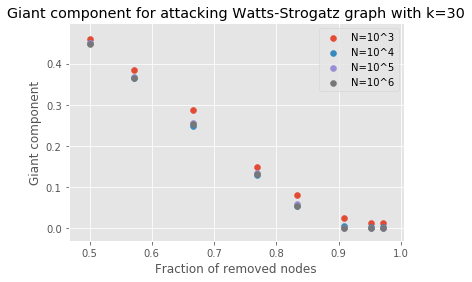

In [40]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Watts-Strogatz graph with k=30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Watts-Strogatz graph with k=30")
plt.show()

### Random Graph

In [41]:
# k=10
er3 = nx.fast_gnp_random_graph(n=1000, p=10/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=10/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=10/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=10/(1000000-1))

In [42]:
def mean_degree(G):
    degrees = [G.degree(n) for n in G.nodes()]
    return sum(degrees)/float(len(degrees))

print(mean_degree(er3))
print(mean_degree(er4))
print(mean_degree(er5))
print(mean_degree(er6))

10.142
10.1082
10.00158
10.00236


In [43]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking(er6)])

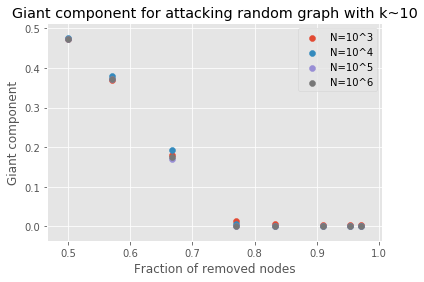

In [44]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking random graph with k~10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking random graph with k~10")
plt.show()

In [45]:
# k=20
er3 = nx.fast_gnp_random_graph(n=1000, p=20/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=20/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=20/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=20/(1000000-1))
print(mean_degree(er3))

19.89


In [46]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking(er6)])

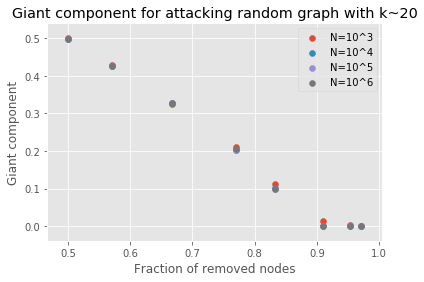

In [47]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking random graph with k~20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking random graph with k~20")
plt.show()

In [48]:
# k=30
er3 = nx.fast_gnp_random_graph(n=1000, p=30/(1000-1))
er4 = nx.fast_gnp_random_graph(n=10000, p=30/(10000-1))
er5 = nx.fast_gnp_random_graph(n=100000, p=30/(100000-1))
er6 = nx.fast_gnp_random_graph(n=1000000, p=30/(1000000-1))
print(mean_degree(er3))

29.878


In [49]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(er3) for x in giant_when_attacking(er3)])
gs.append([x/giant_without_attacking(er4) for x in giant_when_attacking(er4)])
gs.append([x/giant_without_attacking(er5) for x in giant_when_attacking(er5)])
gs.append([x/giant_without_attacking(er6) for x in giant_when_attacking(er6)])

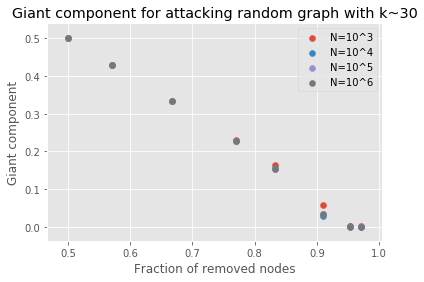

In [50]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking random graph with k~30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking random graph with k~30")
plt.show()

### Barabasi-Albert graph

In [51]:
# k=10
ba3 = nx.barabasi_albert_graph(n=1000,m=5)
ba4 = nx.barabasi_albert_graph(n=10000,m=5)
ba5 = nx.barabasi_albert_graph(n=100000,m=5)
ba6 = nx.barabasi_albert_graph(n=1000000,m=5)
print(mean_degree(ba3))

9.95


In [52]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking(ba6)])

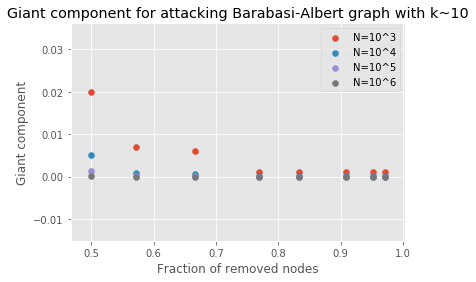

In [53]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi-Albert graph with k~10")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi-Albert graph with k~10")
plt.show()

In [54]:
# k=20
ba3 = nx.barabasi_albert_graph(n=1000,m=10)
ba4 = nx.barabasi_albert_graph(n=10000,m=10)
ba5 = nx.barabasi_albert_graph(n=100000,m=10)
ba6 = nx.barabasi_albert_graph(n=1000000,m=10)
print(mean_degree(ba3))

19.8


In [55]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking(ba6)])

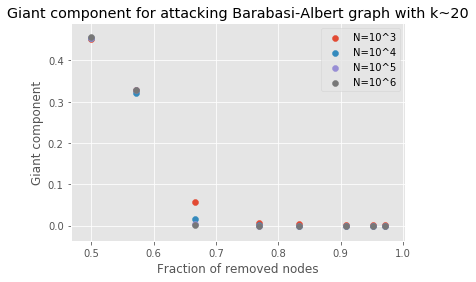

In [56]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi-Albert graph with k~20")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi-Albert graph with k~20")
plt.show()

In [57]:
# k=30
ba3 = nx.barabasi_albert_graph(n=1000,m=15)
ba4 = nx.barabasi_albert_graph(n=10000,m=15)
ba5 = nx.barabasi_albert_graph(n=100000,m=15)
ba6 = nx.barabasi_albert_graph(n=1000000,m=15)
print(mean_degree(ba3))

29.55


In [58]:
# Calculate
gs = list()
gs.append([x/giant_without_attacking(ba3) for x in giant_when_attacking(ba3)])
gs.append([x/giant_without_attacking(ba4) for x in giant_when_attacking(ba4)])
gs.append([x/giant_without_attacking(ba5) for x in giant_when_attacking(ba5)])
gs.append([x/giant_without_attacking(ba6) for x in giant_when_attacking(ba6)])

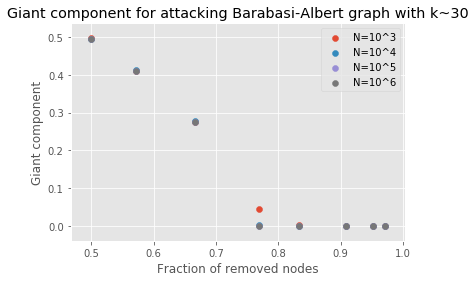

In [59]:
# Plot
fractions = [1.0/2.0, 1.0/1.75, 1.0/1.5, 1.0/1.3, 1.0/1.2, 1.0/1.1, 1.0/1.05, 1.0/1.03] 
plt.scatter(fractions, gs[0])
plt.scatter(fractions, gs[1])
plt.scatter(fractions, gs[2])
plt.scatter(fractions, gs[3])
plt.title("Giant component for attacking Barabasi-Albert graph with k~30")
plt.xlabel("Fraction of removed nodes")
plt.ylabel("Giant component")
plt.legend(["N=10^3", "N=10^4", "N=10^5", "N=10^6"])
plt.savefig("Giant component for attacking Barabasi-Albert graph with k~30")
plt.show()

In [60]:
timeit.default_timer() - start_time

21549.853946743002